# <center>Capstone Project - The Battle of the Neighborhoods</center>  <a name= "top"></a>

# <center>Toronto Canada</center>

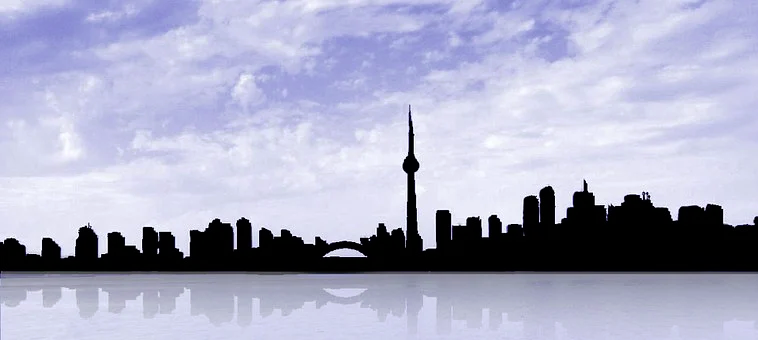

##  <center>Applied Data Science Capstone by IBM/Coursera  ---- Valeriu Badea</center>

## Table of contents
### --Text
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)
### -- Code 
* [1.0 Create a dataframe and a map with info in Toronto](#Cap1) 
* [2.0 Process the demographics file ](#Cap2)
* [3.0 Create venues dataframe in Toronto ](#Cap3) 
* [4.0 Explore Neighborhoods in Toronto  ](#Cap4)
* [5.0 Analyze Each Neighborhood ](#Cap5) 
* [6.0 Cluster Neighborhoods ](#Cap6)
* [7.0 Examine Clusters](#Cap7) 


## <a name="introduction"></a> Introduction: Business Problem 

 Some investors from my native country, Romania asked me to analyze the investment possibilities in Toronto, Canada.
 The project can be also used by Toronto visitors, people who want to relocate in Toronto and investors interested in another kind of business
 Anyway their first preference is a traditional Romanian restaurant.
 The business requirements are large and the most important information come from financial data of the similar 
 businesses around the chosen location. How many clients, how much they spend, what is the preferred menu are questions 
 which will be analyzed in the followings studies. This initial project is going to respond to general problems like:

1. Position (how many similar businesses are around, landscape, parking, local traffic, etc.
   *  Proximity to other businesses. Neighboring businesses may influence your store's sales, and their presence can work for you or against you. 
   *  Customer parking facilities. The site should provide convenient, adequate parking as well as easy access for customers. 
   *  Accessibility. Consider how easy it will be for customers to reach into your business. If you are mostly considering pedestrian traffic, 
      consider whether or not nearby businesses will generate foot traffic for you.      
   *  The rent-paying capacity. If you have done a sales-and-profit projection for your first year of operation, you will know approximately how much 
      revenue you can expect to generate, and you can use that information to decide how much rent you can afford to pay.
   *  Traffic density. you have to check for food traffic, and to approximate sales potential of each pedestrian passing a given location.
      Two factors are very important: total pedestrian traffic during business hours and the percentage of it that is likely to patronize your food service business.
   *  History of the site. Take out the recent history of each site into consideration before you make a final selection. Who were the previous tenants,
      and why are they no longer there?
   *  Anticipated sales volume. Can the location contribute to your sales volume? 
      Consider how easy it will be for customers to get into your business.
2. Demographic (nationality, income, age, etc.). Age is very important if you consider a restaurant business. 
    *  Generation Y (born between 1965 and 1980) is the most ethnically diverse generation yet and is more than three times the size of generation X. They are a prime target 
        for a food-service business. About 25 percent of their restaurant visits are to burger franchises, follow by pizza restaurants at 12 percent.
    *  Baby boomers. (born between 1946 and 1964) They represent a group of affluent professionals who can afford to visit upscale restaurants and spend money freely. 
       During the 1980s, they were the main customer group for upscale, trendy restaurants. Today, those on the leading edge of the boomer generation are becoming grandparents,
       making them best customers for restaurants that offer a family-friendly atmosphere and those that provide an upscale, formal dining experience.
    *  Seniors age 65 and older. Generally, on fixed incomes and may not often be able to afford upscale restaurants.
       They like to visit family-style restaurants that offer good service and reasonable prices. "Younger" seniors are likely to be more 
       active and have more disposable income than "older" seniors, whose health may be declining. Seniors typically appreciate restaurants that offer 
       early-bird specials and senior menus with lower prices and smaller portions, since their appetites are less hearty than those of younger people.
       
       
[Go on top](#top)


## Data <a name="data"></a>

  * After understanding the business I started an extensive search process for the most suitable data.
  * The data have been clear out from nonimportant information. Useful tables have been copied and meaningful information has been stored
    in pandas dataframes which could be visualized and analyzed
  * The main idea is to use foursquare to find out the venues around some centroids,and after that to analyze the best opportunity
     to place a business,in our case a restaurant.
  * In order to do this a grid of equidistance centroids should be created to cover the whole city and its borrows.
  * In Toronto case this isn't necessary because only a part of Postal offices cover the whole city.
  * A subroutine in my code shows that the distances between any different postal offices locations is less than 700 m,
     so the whole city can be covered by just a group of postal office location using a search radius of 500 m.
  * I am happy about this discovery because I can use some work already done. Thank’ s
  * Information from ‘Demographics_of_Toronto_neighbourhoods' help me to create comparations between Toronto
     neighborhoods pertinent to establishment of a new business
     


####  I found the following useful data:

* List of postal codes of Toronto Canada from Wikipedia  'http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' 
* IBM file                                               'http://cocl.us/Geospatial_data'       
* Foursquare API
* Latitude/Longitude Distance Calculator                 'https://www.nhc.noaa.gov/gccalc.shtml'
* Demographics of Toronto Neighbourhoods from Wikipedia  'https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'



[Go on top](#top)

##   Import and download the necesary libraries

In [1]:
import numpy as np       # library to handle data in a vectorized manner

import pandas as pd      # library data analsysis
import json              # library to handle JSON files
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

In [2]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [4]:
from geopy.geocoders import Nominatim     # convert an address into latitude and longitude values
import requests             # library to handle requests            
from pandas.io.json  import json_normalize     # tranform JSON file into a pandas dataframe


In [5]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print ('Library imported')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


altair-4.1.0         | 614 KB    | ##################################### | 1

##   1.0    Create a dataframe and a map with info  in Toronto   <a name="Cap1"></a>

In [6]:
# read the file into a pandas dataframe
import requests
d = pd.read_html('http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
df = d[0]
print('dataframe dimensions are: ',df.shape)
df[0:5]


dataframe dimensions are:  (180, 3)


,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [7]:
# get rid of the of the non semnificative data
subDF1 = df[df['Borough'] != 'Not assigned']  
subDF1 = subDF1.sort_values(['Postal code'])
print('dataframe dimensions : ', subDF1.shape)
subDF1[0:5]

dataframe dimensions :  (103, 3)


,Postal code,Borough,Neighborhood
9,M1B,Scarborough,Malvern / Rouge
18,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
27,M1E,Scarborough,Guildwood / Morningside / West Hill
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae


In [8]:
# read the file containing location information (latitude and longitude)

df1 = pd.read_csv('http://cocl.us/Geospatial_data')  
df11 = df1.sort_values(['Postal Code'])
print('dataframe dimensions : ', df1.shape)
df1.head()

dataframe dimensions :  (103, 3)


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
# add the Latitude and Longitude columns to the initial dataset
subDF1['Latitude'] = df1['Latitude'].values
subDF1['Longitude'] = df1['Longitude'].values

# change the name of dataframe to be more expresive
toronto_data = subDF1
toronto_data.shape
print('dataframe dimensions : ', toronto_data.shape)
toronto_data.head()

dataframe dimensions :  (103, 5)


,Postal code,Borough,Neighborhood,Latitude,Longitude
9,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
18,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
27,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
36,M1G,Scarborough,Woburn,43.770992,-79.216917
45,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


######      The following code calculate the distance in km between 2 points  using their latitude and longitude coordinates.


In [10]:

# Python program to calculate Distance Between Two Points on Earth 
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 


######       It shows that the distances between every 2 postal centers is less then 1 km. 
           

In [11]:
# calculate the distances between 2 locations of Postal Codes using their latitue and longitude
# take data from dataframe and initialize variable
lng_lst = []
lat_lst = []
#lat_lst = toronto_data['Latitude']
#lng_lst = toronto_data['Longitude']
lat_lst = df1['Latitude']
lng_lst = df1['Longitude']

rowy = []
rowx = []
dist_max = []

# create data for a data frame With the distances between each postal unit in km
# create a list with the closest units ---the minimum distance--between each postal units
for i in range (0, len(lat_lst)):
    dist_m = 2000
    rowx = []            
    for j in range (0, len(lat_lst)):  
        dist = distance(lat_lst[i], lat_lst[j], lng_lst[j], lng_lst[j])        
        rowx.append(distance(lat_lst[i], lat_lst[j], lng_lst[j], lng_lst[j]))
        if (dist < dist_m) and (dist != 0):
            dist_m = dist
    rowy.append(rowx)  
    dist_max.append(dist_m) 

df2 = pd.DataFrame(rowy, columns = df1['Postal Code'], index= df1['Postal Code'])
print('dataframe dimensions: ', df2.shape)
df2.head()
                           

dataframe dimensions:  (103, 103)


Postal Code,M1B,M1C,M1E,M1G,M1H,M1J,M1K,M1L,M1M,M1N,M1P,M1R,M1S,M1T,M1V,M1W,M1X,M2H,M2J,M2K,M2L,M2M,M2N,M2P,M2R,M3A,M3B,M3C,M3H,M3J,M3K,M3L,M3M,M3N,M4A,M4B,M4C,M4E,M4G,M4H,M4J,M4K,M4L,M4M,M4N,M4P,M4R,M4S,M4T,M4V,M4W,M4X,M4Y,M5A,M5B,M5C,M5E,M5G,M5H,M5J,M5K,M5L,M5M,M5N,M5P,M5R,M5S,M5T,M5V,M5W,M5X,M6A,M6B,M6C,M6E,M6G,M6H,M6J,M6K,M6L,M6M,M6N,M6P,M6R,M6S,M7A,M7R,M7Y,M8V,M8W,M8X,M8Y,M8Z,M9A,M9B,M9C,M9L,M9M,M9N,M9P,M9R,M9V,M9W
Postal Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M1B,0.000000,2.463101,4.794025,3.969014,3.730623,6.888759,8.757390,10.627411,10.048719,12.679480,5.479319,6.295279,1.388380,2.785299,0.952485,0.796278,3.273401,0.325145,3.132228,2.194877,5.470357,1.960734,4.065998,5.996520,2.663107,5.940889,6.758483,8.983060,5.821944,4.303911,7.696146,7.524750,8.694320,5.009887,8.984995,11.151639,12.380710,14.491912,10.855505,11.265981,13.492315,14.136122,15.310185,16.363534,8.747238,10.445118,10.152419,11.382124,13.022260,13.373859,14.135510,15.424882,15.659181,16.949042,16.626366,17.256608,18.004182,16.538455,17.359207,18.443969,17.736647,17.623039,8.162130,10.562573,12.202387,14.897518,16.011035,17.066264,19.763742,17.819109,17.597387,9.803868,10.798061,12.554463,13.083273,15.249750,15.309451,17.653262,18.885246,10.333356,12.850853,14.844634,16.131938,17.538398,17.248079,16.054857,18.872081,16.005665,22.354595,22.714077,17.016460,18.950773,19.775517,15.437270,17.317843,18.143798,5.602334,9.109133,11.098399,12.272284,13.096639,7.480072,11.112599
M1C,2.463101,0.000000,2.330924,1.505913,1.267522,4.425658,6.294289,8.164310,7.585618,10.216379,3.016218,3.832177,1.074721,0.322198,3.415586,1.666823,5.736502,2.137956,0.669127,0.268224,3.007256,0.502368,1.602897,3.533419,0.200006,3.477788,4.295382,6.519959,3.358843,1.840810,5.233045,5.061649,6.231219,2.546786,6.521894,8.688538,9.917609,12.028811,8.392404,8.802880,11.029214,11.673021,12.847084,13.900433,6.284137,7.982017,7.689318,8.919023,10.559159,10.910758,11.672409,12.961781,13.196080,14.485941,14.163265,14.793506,15.541081,14.075354,14.896106,15.980868,15.273546,15.159938,5.699029,8.099472,9.739286,12.434417,13.547934,14.603163,17.300641,15.356008,15.134286,7.340767,8.334960,10.091362,10.620172,12.786649,12.846350,15.190161,16.422145,7.870255,10.387752,12.381533,13.668837,15.075297,14.784978,13.591756,16.408980,13.542564,19.891494,20.250976,14.553359,16.487672,17.312416,12.974168,14.854742,15.680697,3.139233,6.646032,8.635298,9.809183,10.633537,5.016971,8.649498
M1E,4.794025,2.330924,0.000000,0.825011,1.063402,2.094735,3.963365,5.833386,5.254694,7.885455,0.685294,1.501254,3.405645,2.008725,5.746509,3.997747,8.067425,4.468880,1.661797,2.599148,0.676332,2.833291,0.728027,1.202495,2.130917,1.146864,1.964459,4.189035,1.027919,0.490114,2.902121,2.730725,3.900295,0.215863,4.190970,6.357614,7.586685,9.697888,6.061480,6.471956,8.698290,9.342097,10.516160,11.569510,3.953213,5.651093,5.358395,6.588099,8.228236,8.579834,9.341486,10.630858,10.865157,12.155018,11.832341,12.462583,13.210157,11.744430,12.565182,13.649944,12.942622,12.829015,3.368105,5.768548,7.408362,10.103494,11.217011,12.272239,14.969717,13.025085,12.803362,5.009843,6.004037,7.760438,8.289248,10.455726,10.515426,12.859237,14.091222,5.539331,8.056829,10.050609,11.337913,12.744373,12.454054,11.260833,14.078056,11.211640,17.560570,17.920052,12.222435,14.156749,14.981493,10.643245,12.523818,13.349774,0.808309,4.315108,6.304374,7.478259,8.302614,2.686047,6.318574
M1G,3.969014,1.505913,0.825011,0.000000,0.238391,2.919745,4.788376,6.658397,6.079705,8.710466,1.510305,2.326265,2.580634,1.183714,4.921499,3.172736,7.242415,3.643869,0.836786,1.774137,1.501343,2.008280,0.096984,2.027506,1.305907,1.971875,2.789469,5.014046,1.852930,0.334897,3.727132,3.555736,4.725306,1.040873,5.015981,7.182625,8.411696,10.522899,6.886491,7.296967,9.523301,10.167108,11.341171,12.394520,4.778224,6.476104,6.183405,7.413110,9.053246,9.404845,10.166497,11.455868,11.690167,12.980028,12.657352,13.28759

In [12]:
# Use Nomonatim to get the latitude and longitude of Toronto Canada

address = 'Toronto, Canada'
geolocator = Nominatim(user_agent = 'toronto_explorer')
location = geolocator.geocode(address)
#geolocator = Nominatim(user_agent = 'toronto_explorer')
latitude = location.latitude
longitude = location.longitude
print('The geografical coordinate of Toronto are {}, {}'.format(latitude, longitude)) 

The geografical coordinate of Toronto are 43.6534817, -79.3839347


In [13]:
# Use folium to generate a map of Toronto, Canada with postal codes included

map_Toronto = folium.Map(location =[latitude,longitude], zoom_start =10)

for lat, lng, postal_code  in zip( df1['Latitude'], df1['Longitude'], df1['Postal Code']):
    label = '{}'.format(postal_code) 
    label = folium.Popup(label, parse_html= True)
    folium.CircleMarker([lat, lng], radius = 5, popup = label, color = 'blue', fill= True, fill_color= '#3186cc', fill_opacity= 0.7, parse_htlm= False).add_to(map_Toronto)
map_Toronto

####           The position of the selected postal codes on the Toronto map [Go on top](#top) 

## Methodology <a name= "methodology"></a>

 * Determining the location of any business is very important especially in the case of a restaurant.
 * The venues around can strongly influence positively or negatively the turnover of any business 
 * The price of buying or renting the location also depends on the position of the restaurant in different areas of the city.
 * In my case, when you want to create a restaurant with a national profile, you need to pay a careful attention to the demographic analysis of the city.

 * To accomplish this I will use foursquare. This software scans the area around a point on a certain radius.
 * It retrieves a json file with information regarding to the venues located in that area.
 * My job would be to form a network of equidistant nodes that would cover the whole city

 * Fortunately, this is not necessary in my case. The file "List_of_postal_codes_of_Canada:_M" 
 which I used in a previous project can be used as a grid.
 * Some lines of code proves that the distance between any 2 locations is less than 1 km.
 * Another problem could be that there is a possibility that a venue is framed at 2 nodes, but the 
 the duplicates based on latitude, latitude and category are eliminated in the process
 of creating the final file(dataframe)
 
 * A map of Toronto with the exploration points on it have been designed using Folium software. 
 * The collected data is processed for use of the k-mean cluster algorithm. 
 * I chose this k-mean algorithm to segment and group different areas of Toronto.
 * The main idea is to see how and why this k-mean clustering algorithm divides Toronto from the venues business point of view.
 * The analysis of these segmentation criteria would have helped me draw conclusions where it would be
better to recommend the location of the restaurant.

[Go on top](#top)

In [83]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
    
# set color scheme for the clusters
x = np.arange(kclusters)
print('x=', x)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
    
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], 
toronto_merged['Postal code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
#        print('cluster= ', cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
           
map_clusters


x= [0 1 2 3 4]


In [89]:
cluster1

,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,M1C,0,Bar,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
152,M9W,0,Rental Car Location,Drugstore,Bar,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


In [90]:
cluster2

,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,M3M,1,Food Truck,Baseball Field,Yoga Studio,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Falafel Restaurant
169,M8Y,1,Baseball Field,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
89,M9M,1,Food Service,Baseball Field,Yoga Studio,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Falafel Restaurant


In [91]:
cluster3

,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
100,M2P,2,Park,Convenience Store,Bank,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dance Studio
2,M3A,2,Park,Food & Drink Shop,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
65,M3K,2,Park,Airport,Bus Stop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
57,M4J,2,Park,Convenience Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
93,M4N,2,Swim School,Park,Bus Line,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Yoga Studio
147,M4W,2,Park,Trail,Playground,Yoga Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
103,M5P,2,Sushi Restaurant,Trail,Jewelry Store,Park,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
23,M6C,2,Park,Field,Hockey Arena,Trail,Yoga Studio,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
32,M6E,2,Park,Women's Store,Pool,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
77,M6L,2,Park,Bakery,Construction & Landscaping,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Dance Studio,Distribution Center


In [92]:
cluster4

,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,M1B,3,Fast Food Restaurant,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
27,M1E,3,Electronics Store,Rental Car Location,Bank,Medical Center,Intersection,Breakfast Spot,Mexican Restaurant,Donut Shop,Doner Restaurant,Dog Run
36,M1G,3,Coffee Shop,Korean Restaurant,Insurance Office,Yoga Studio,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
45,M1H,3,Gas Station,Bakery,Fried Chicken Joint,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Bank,Hakka Restaurant,Doner Restaurant,Dog Run
63,M1K,3,Discount Store,Train Station,Department Store,Coffee Shop,Hobby Shop,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Yoga Studio
72,M1L,3,Bakery,Bus Line,Soccer Field,Park,Ice Cream Shop,Bus Station,Metro Station,Intersection,Yoga Studio,Diner
81,M1M,3,American Restaurant,Motel,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Yoga Studio,Dance Studio
90,M1N,3,College Stadium,Skating Rink,Café,General Entertainment,Yoga Studio,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
99,M1P,3,Indian Restaurant,Pet Store,Vietnamese Restaurant,Chinese Restaurant,Yoga Studio,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
108,M1R,3,Smoke Shop,Bakery,Shopping Mall,Auto Garage,Middle Eastern Restaurant,Breakfast Spot,Sandwich Place,Distribution Center,Dim Sum Restaurant,Diner


In [93]:
cluster5

,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,M1J,4,Playground,Convenience Store,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
135,M1V,4,Park,Playground,Yoga Studio,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run
129,M4T,4,Playground,Yoga Studio,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run


## Results <a name= "results"></a>

 * The k-mean clustering model found only 5 clusters.
 * Cluster no 1 has only 2 items and I name it electronics, each of them has an electronics store
 * Cluster no 2 has only 3 items and name it sport. It contains a lot of baseball fields, yoga places, etc.
 * Cluster No 3 has 12 items and with a lot of parks in it.I will call it recreational
 * Cluster No 4 has 78 items.I will call it general.
 * Cluster No 5 has 3 items. I will call it outdoor, for its 3 playgrounds, 3 dog run places and 1 park.  
 * This practically means ( with 80 % of items in one cluster) that no enough differences were found between the           collection points
 * Another main aspect of the analysis is the designation of spots where similar businesses are located.
 * In my case it would have been to determine the number of Romanian restaurants located around the centroids.
 * In Toronto is only one traditional Romanian restaurant named 'Moldova' located in East York.
 * This situation makes the determining of the number and location of Romanian restaurants around the city of        Toronto inappropriate.
 * Anyway, just with several lines of codes this improvement can be added to the project
 * Now I got the feeling that the data and information I have at this time are insufficient and inconclusive.
 * A deeper analysis supported by additional data must be tried.
 * So as the theory says I have to go back from the evaluation to the modeling phase.

[Go on top](#top)

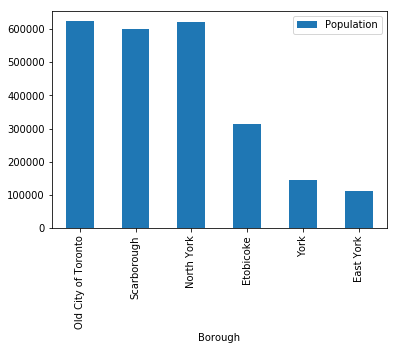

In [94]:
dd_agg.plot.bar(x= "Borough", y= "Population")

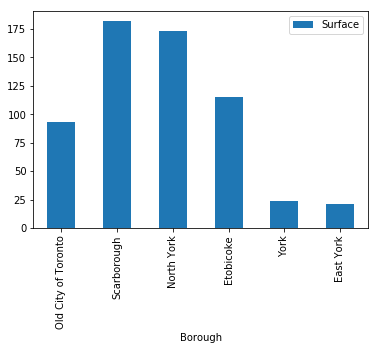

In [95]:
dd_agg.plot.bar(x= "Borough", y= "Surface")

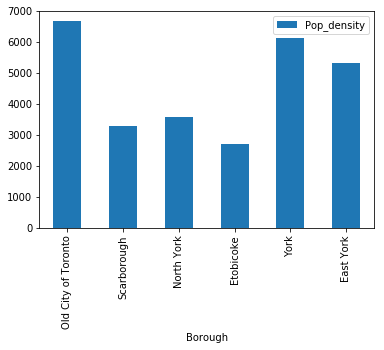

In [96]:
dd_agg.plot.bar(x= "Borough", y= "Pop_density")


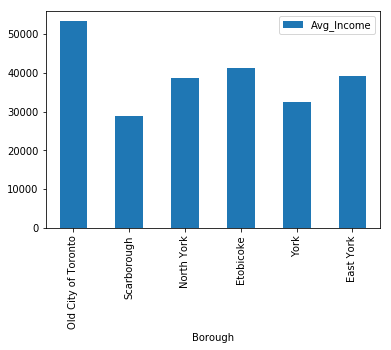

In [97]:
dd_agg.plot.bar(x= "Borough", y= "Avg_Income")


[Go on top](#top)

## Disscusion <a name= "discussion"></a>

* Given the fact that I am looking to optimize the location of a national restaurant, I will continue
  to focus more on the demographic aspect of the city of Toronto
* I am encouraged in this direction by the fact that the results from the k-mean clustering model are quite         evasive and inconclusive.
* I found a file in Wikipedia that includes information about the population, average income, area, second         language spoken after English, etc. The file gives all these info for the Toronto city and its borough and       neighborhood
* The file is called "Demographics_of_Toronto_neighbourhoods"
* The file has been downloaded into a pandas dataframe, clean out, etc. 
* It has been processed so that the meaningful data can be visualized and analyzed. 

[Go on top](#top)

##  2.0  Process the demographics file  Data   <a name="Cap2"></a>

In [23]:
# read the file into a pandas dataframe   
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import requests
dd = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods')
dd_1 = dd[1]

print('dimensions: ', dd_1.shape)
dd_1.head()


dimensions:  (175, 13)


,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


In [24]:
# extract the useful data and rename the columns
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_1 = dd_1[['Name', 'FM', 'Population','Land area (km2)', 'Average Income', '% Renters', '% Change in Population since 2001','Second most common language (after English) by name']]


print('dimensions: ', df_1.shape)
df_1.rename(columns = {'Land area (km2)':'Surface', 'Average Income': 'Income_avg', '% Change in Population since 2001': 'Populat_chg',
                      '% Renters':'Renters','Second most common language (after English) by name':'Lang2_name'}, inplace = True) 

df_1.head()

dimensions:  (175, 8)


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name
0,Toronto CMA Average,NaN,5113149,5903.63,40704,11.4,9.0,NaN
1,Agincourt,S,44577,12.45,25750,5.9,4.6,Cantonese (19.3%)
2,Alderwood,E,11656,4.94,35239,8.5,-4.0,Polish (6.2%)
3,Alexandra Park,OCoT,4355,0.32,19687,28.0,0.0,Cantonese (17.9%)
4,Allenby,OCoT,2513,0.58,245592,3.4,-1.0,Russian (1.4%)


In [25]:
# create a function which receive a string and separate in 2 substings in idea to create 2 columns
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

def sep_pct(astr):
    wstr = str(astr)
    lang = []
    found = False
    lang_name = ''
    lang_pct = 0
    for i in range(0, len(wstr)-1):
        
        if (wstr[i] == '('):
            lang_name =wstr[:(i)]
            lang_pct = wstr[(i+1):len(wstr)-2] 
            lang.append(lang_name)   
            lang.append(lang_pct)  
            found = True
        if found:
            break
            
    if found:
        return lang
    else:
        lang = ['',0]
        return lang

    
# change the Neighborhood column 
wlst = list(df_1['Lang2_name'])

language_name = []
language_pct = []
for i in range (0,len(wlst)):
    res = []
    res = sep_pct(wlst[i])
    language_name.append(res[0])
    language_pct.append(res[1])
    
    
df_1['Lang2_name'] = language_name                          
df_1['Lang2_pct'] = language_pct   
print(df_1.shape)
df_1.head()

(175, 9)


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name,Lang2_pct
0,Toronto CMA Average,NaN,5113149,5903.63,40704,11.4,9.0,,0
1,Agincourt,S,44577,12.45,25750,5.9,4.6,Cantonese,19.3
2,Alderwood,E,11656,4.94,35239,8.5,-4.0,Polish,6.2
3,Alexandra Park,OCoT,4355,0.32,19687,28.0,0.0,Cantonese,17.9
4,Allenby,OCoT,2513,0.58,245592,3.4,-1.0,Russian,1.4


In [42]:
# define a function which will be used to create aggregations for groupped dataframes
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
def get_agg_lst(name, df_wk):
    pop_lt = list(df_wk.iloc[:,2])
    sur_lt = list(df_wk.iloc[:,3])
    inc_lt = list(df_wk.iloc[:,4])
    pop_s =0
    sur_s =0
    wage = 0
    for i in range(0, df_wk.shape[0]):
        pop_s = pop_lt[i] + pop_s
        sur_s = round((sur_lt[i] + sur_s),2) 
        wage = pop_lt[i] * inc_lt[i] + wage
#---------------------------------------------------------------        
    den_avg = round(pop_s / sur_s)
    inc_avg = round(wage / pop_s)
    row_wk = [name,pop_s,sur_s,den_avg,inc_avg]
    return(row_wk)
    

In [44]:
# create a Toronto borough dataframe and get the aggregation row
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_sc = df_1[df_1['FM'] == 'S']
print('dimension = ',df_sc.shape)
#---------------------------------------
list_sc = get_agg_lst('Scarborough', df_sc)    
print(list_sc)    
df_sc.head(5)

dimension =  (29, 9)
['Scarborough', 600715, 182.23, 3296, 28806]


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name,Lang2_pct
1,Agincourt,S,44577,12.45,25750,5.9,4.6,Cantonese,19.3
13,Bendale,S,28945,8.49,29723,10.4,12.9,Tamil,3.7
14,Birch Cliff,S,12266,3.48,48965,15.2,-3.0,Unspecified Chinese,0.9
29,Clairlea,S,11104,3.58,33392,12.7,1.8,Filipino,4.3
30,Cliffcrest,S,14531,7.01,38182,12.2,-2.9,Tamil,1.5


In [45]:
# create a Toronto borough dataframe and get the aggregation row
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_to = df_1[df_1['FM'] == 'OCoT']
print('dimension= ',df_to.shape)
#------------------------------------
list_to = get_agg_lst('Old City of Toronto', df_to)    
print(list_to)    
df_to.head()


dimension=  (64, 9)
['Old City of Toronto', 624910, 93.43, 6689, 53402]


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name,Lang2_pct
3,Alexandra Park,OCoT,4355,0.32,19687,28.0,0.0,Cantonese,17.9
4,Allenby,OCoT,2513,0.58,245592,3.4,-1.0,Russian,1.4
9,Bay Street Corridor,OCoT,4787,0.11,40598,49.3,3.0,Mandarin,9.6
12,Bedford Park,OCoT,13749,2.27,80827,10.1,-1.4,Greek,0.7
15,Bloor West Village,OCoT,5175,0.74,55578,8.3,-2.0,Ukrainian,3.6


In [46]:
# create a Toronto borough dataframe and get the aggregation row
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_y = df_1[df_1['FM'] == 'Y']
print('dimension= ',df_y.shape)
#------------------------------------------------------
list_y = get_agg_lst('York', df_y)    
print(list_y)    
df_y.head()


dimension=  (10, 9)
['York', 143255, 23.34, 6138, 32431]


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name,Lang2_pct
52,Fairbank,Y,34121,4.42,28403,16.4,-3.6,Portuguese,11.3
66,Harwood,Y,3375,0.78,22136,17.8,0.0,Portuguese,19.0
79,Humewood–Cedarvale,Y,27515,3.19,40404,26.0,-7.8,Spanish,3.6
85,Lambton,Y,9654,2.74,30920,15.9,-3.2,Portuguese,3.9
106,Mount Dennis,Y,21284,3.29,23910,19.9,-3.1,Spanish,7.3


In [47]:
# create a Toronto borough dataframe and get the aggregation row
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_ny = df_1[df_1['FM'] == 'NY']
print('dim = ',df_ny.shape)
#------------------------------------------------
list_ny = get_agg_lst('North York', df_ny)    
print(list_ny)    
df_ny.head(5)

dim =  (40, 9)
['North York', 621068, 173.44, 3581, 38537]


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name,Lang2_pct
5,Amesbury,NY,17318,3.51,27546,19.7,1.1,Spanish,6.1
6,Armour Heights,NY,4384,2.29,116651,16.1,2.0,Russian,9.4
7,Banbury,NY,6641,2.72,92319,4.8,5.0,Unspecified Chinese,5.1
8,Bathurst Manor,NY,14945,4.69,34169,18.6,12.3,Russian,9.5
10,Bayview Village,NY,12280,4.14,46752,15.6,41.6,Cantonese,8.4


In [48]:
# create a Toronto borough dataframe and get the aggregation row
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_ey = df_1[df_1['FM'] == 'EY']
print('dim = ',df_ey.shape)
#--------------------------------------------
list_ey = get_agg_lst('East York', df_ey)    
print(list_ey)    
df_ey.head(5)

dim =  (6, 9)
['East York', 112054, 21.05, 5323, 39186]


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name,Lang2_pct
33,Crescent Town,EY,8157,0.40,23021,20.3,-10.0,Bengali,18.1
60,Governor's Bridge/Bennington Heights,EY,2112,1.87,129904,13.3,4.0,Polish,1.4
91,Leaside,EY,13876,2.81,82670,10.5,3.0,Bulgarian,0.4
112,O'Connor–Parkview,EY,17740,4.94,33517,19.4,-6.1,Urdu,3.2
113,Old East York,EY,52220,7.94,33172,19.1,-4.6,Greek,4.3


In [49]:
# create a Toronto borough dataframe and get the aggregation row
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_e = df_1[df_1['FM'] == 'E']            
print('dim = ',df_e.shape)
#-----------------------------------------
list_e = get_agg_lst('Etobicoke', df_e)    
print(list_e)  

df_e.head(5)

dim =  (25, 9)
['Etobicoke', 313772, 115.09, 2726, 41251]


,Name,FM,Population,Surface,Income_avg,Renters,Populat_chg,Lang2_name,Lang2_pct
2,Alderwood,E,11656,4.94,35239,8.5,-4.0,Polish,6.2
24,Centennial,E,12565,4.94,34867,8.8,0.5,Polish,2.7
28,Clairville,E,8506,6.71,26610,7.2,-3.3,Punjabi,12.0
48,Eatonville,E,19131,11.26,36206,13.4,4.3,Serbian,3.2
51,Eringate,E,8008,2.44,34789,4.0,-3.4,Portuguese,3.4


In [50]:
# Create a dataframe with data acumulated from each Toronto districts
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
data_lst = []
data_lst.append(list_to)
data_lst.append(list_sc)
data_lst.append(list_ny)
data_lst.append(list_e)
data_lst.append(list_y)
data_lst.append(list_ey)
#------------------------------
dd_agg = pd.DataFrame(data_lst, columns=['Borough', 'Population', 'Surface','Pop_density', 'Avg_Income',])
dd_agg


,Borough,Population,Surface,Pop_density,Avg_Income
0,Old City of Toronto,624910,93.43,6689,53402
1,Scarborough,600715,182.23,3296,28806
2,North York,621068,173.44,3581,38537
3,Etobicoke,313772,115.09,2726,41251
4,York,143255,23.34,6138,32431
5,East York,112054,21.05,5323,39186


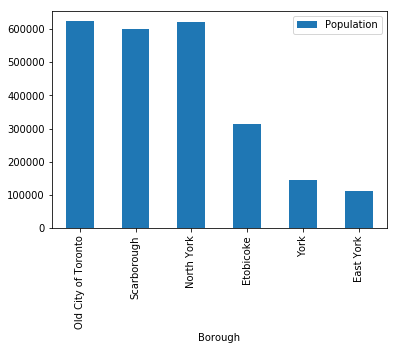

In [51]:
# create a bar for population in Toronto 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dd_agg.plot.bar(x= "Borough", y= "Population")

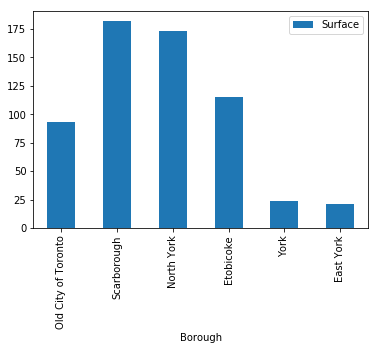

In [52]:
# create a bar for area  of Toronto 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dd_agg.plot.bar(x= "Borough", y= "Surface")

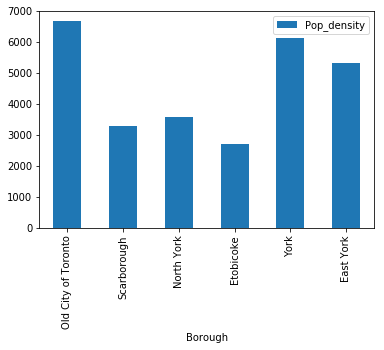

In [53]:
# create a bar for population density in Toronto 
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dd_agg.plot.bar(x= "Borough", y= "Pop_density")


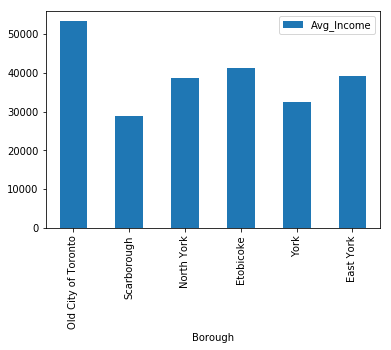

In [54]:
# create a bar for average income in Toronto 
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
dd_agg.plot.bar(x= "Borough", y= "Avg_Income")


[Go on top](#top)

## Conclusion <a name= "conclusion"></a>




 * After examining the demographic data, it can be seen that "Old Toronto" is the city borough with 
   the highest population but also, with the highest population density
 * In terms of average earnings Old Toronto is again in first place with an average of 53407 dollars
 * After than come Etobicoke with 41251 and East York with 39186 dollars.
 * The last ones are North York with 38537, York with 32431 and at last Scarborough with 28806 dollars
 * From the above mentioned file I didn't get any information regarding the Romanian community in Toronto.
 * I searched the internet and I found out that in Toronto are only 30,000 Romanians.
 * No any information on how they are spread in the city was found.
 * Consequently, I looked for information on Eastern or Southeast European populations that may become
   future customers. 
 * I found out that in Old Toronto and East York there are 11 respective 21 neighborhoods where the population      has a east or south east native European language. 
 * The only Romanian restaurant in Toronto, 'Moldova', is located in East York and is a 3.5 star restaurant
   under Russian management
 * From their list of remarks I noticed that people with Romanian names leave an unsatisfactory message 
   like 'I didn't find what I expected', the other people leave good or very good messages.
 * I conclude from here that there is still a requirement of an authentic Romanian restaurant.
 
######  ------ Finally, my recommendations are:

 - to continue this study with a statistical survey among the Romanian population in Toronto
 - to consider the establishment of a restaurant with a mixed profile (Romanian but also
   general European / North American)
 - a careful examination of 'Old Toronto' and 'East York' boroughs which looks like the
   best candidates being on top of average income and population density and the most populated
   with east and south-east european people.


[Go on top](#top)

##  3.0  Create venues dataframe  in Toronto      <a name="Cap3"></a>

####                                                                                                 The position of the selected postal codes on the Toronto map

In [55]:
# Create the client credentials
CLIENT_ID = 'VUWQKGII354DQN12VBVMXJBYOU2WLFQTR5SWOGW0CBN0DO4D' # your Foursquare ID
CLIENT_SECRET = '2URCUIF2DKSSGJ5L4JJ3PIIQ2LNYU5IQUORIXL0UUM2DNUOJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
#-----------------------------------------------------------------------------------------------------------

print('Your Credentials: ') 
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET: ' + CLIENT_SECRET)
print('VERSION: '  + VERSION)
#--------------------------------------------------------------------------------------------------------------


Your Credentials: 
CLIENT_ID: VUWQKGII354DQN12VBVMXJBYOU2WLFQTR5SWOGW0CBN0DO4D
CLIENT_SECRET: 2URCUIF2DKSSGJ5L4JJ3PIIQ2LNYU5IQUORIXL0UUM2DNUOJ
VERSION: 20180605


In [56]:
# create url info for an explore request around Toronto---using foursquare

radius = 500
LIMIT = 50
url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        latitude,
        longitude,
        radius,
        LIMIT)

In [57]:
#Send the GET request and examine the resutls

results = requests.get(url).json()
#results

In [58]:
# function that extracts the category of the venue
#    def get_category_type(row):\


def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        
        categories_list = row['venue.categories']
        return None
    else:
        return categories_list
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list [0]['name']
    
    

In [59]:
venues = results['response']['groups'][0]['items']
venues[0:1]

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '5227bb01498e17bf485e6202',
   'name': 'Downtown Toronto',
   'location': {'lat': 43.65323167517444,
    'lng': -79.38529600606677,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.65323167517444,
      'lng': -79.38529600606677}],
    'distance': 113,
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ['Toronto ON', 'Canada']},
   'categories': [{'id': '4f2a25ac4b909258e854f55f',
     'name': 'Neighborhood',
     'pluralName': 'Neighborhoods',
     'shortName': 'Neighborhood',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/neighborhood_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []}},
  'referralId': 'e-0-5227bb01498e17bf485e6202-0'}]

In [60]:
#Now we are ready to clean the json structure it 
#into a *pandas* dataframe.

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
    
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
    
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()


,name,categories,lat,lng
0,Downtown Toronto,None,43.653232,-79.385296
1,Nathan Phillips Square,None,43.652270,-79.383516
2,Eggspectation Bell Trinity Square,None,43.653144,-79.381980
3,Indigo,None,43.653515,-79.380696
4,Chatime 日出茶太,None,43.655542,-79.384684


In [61]:
#The no of venues were returned by Foursquare?
 print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))



50 venues were returned by Foursquare.


[Go on top](#top)

### 4.0  Explore Neighborhoods in Toronto        <a name="Cap4"></a>


Let's create a function to repeat the same process to all the neighborhoods
and postal codes in Toronto


In [62]:
def getNearbyVenues(names, latitudes, longitudes):
      
    LIMIT = 100
    radius = 500
    
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        
    # create the API request URL
        url ='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION, 
            lat,
            lng,
            radius,
            LIMIT)
    
    # make the GET request
#        result = requests.get(url).json()
#        results = result['response']['groups'][0]['items'] 
        results = requests.get(url).json()["response"]['groups'][0]['items']

    #return only relevant information for each nearby venue 
        venues_list.append([(name,lat,lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['name'])    for v in results]) 
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list]) 
    nearby_venues.columns = ['Postal code', 'Neighborhood Latitude', 'Neighborhood Longitude',
                    'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']

    return(nearby_venues)


In [63]:
#Now write the code to run the above function on the requested postal codes in Toronto, Canada.

toronto_venues = getNearbyVenues(names = toronto_data['Postal code'],
                                  latitudes = toronto_data['Latitude'],
                                  longitudes= toronto_data['Longitude']
                                      )

In [64]:
# Find out the dimension of the venues data frame
print(toronto_venues.shape)
toronto_venues.head()



(2110, 7)


,Postal code,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M1B,43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,M1C,43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,M1E,43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
3,M1E,43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,M1E,43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


In [65]:
#check how many venues were returned for each requested Postal code in descending order
toronto_venues['Postal code'].value_counts()[0:5]


M5J    100
M5X    100
M5K    100
M5L    100
M5B    100
Name: Postal code, dtype: int64

In [66]:
#check how many venues were returned for each requested Postal code
toronto_venues.groupby('Postal code').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Postal code,,,,,,
M1B,1,1,1,1,1,1
M1C,1,1,1,1,1,1
M1E,7,7,7,7,7,7
M1G,4,4,4,4,4,4
M1H,8,8,8,8,8,8
M1J,2,2,2,2,2,2
M1K,6,6,6,6,6,6
M1L,10,10,10,10,10,10
M1M,2,2,2,2,2,2


In [67]:
#find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))


There are 262 uniques categories.


[Go on top](#top)

### 5.0   Analyze Each Neighborhood      <a name="Cap5"></a> 


In [68]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
    
# add Postal code column back to dataframe
toronto_onehot['Postal code'] = toronto_venues['Postal code'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
#print(toronto_onehot.shape)    
toronto_onehot.head(5)


,Postal code,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [69]:
# the dimensions of toronto_onehot dataframe
toronto_onehot.shape

(2110, 263)

In [70]:
# Next, group rows by Postal code and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Postal code',sort=False ).mean().reset_index()

toronto_grouped.head()

,Postal code,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hospital,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000

In [71]:
#confirm the new size
toronto_grouped.shape


(98, 263)

In [72]:
#print each neighborhood along with the top 5 most common venues
num_top_venues = 5
    
for hood in toronto_grouped['Postal code']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Postal code'] == hood].T.reset_index()  
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----M1B----
                  venue  freq
0  Fast Food Restaurant   1.0
1    Light Rail Station   0.0
2          Liquor Store   0.0
3                Lounge   0.0
4                Market   0.0


----M1C----
                             venue  freq
0                              Bar   1.0
1                Accessories Store   0.0
2  Molecular Gastronomy Restaurant   0.0
3                           Lounge   0.0
4                           Market   0.0


----M1E----
                 venue  freq
0   Mexican Restaurant  0.14
1       Breakfast Spot  0.14
2  Rental Car Location  0.14
3    Electronics Store  0.14
4       Medical Center  0.14


----M1G----
               venue  freq
0        Coffee Shop  0.50
1   Insurance Office  0.25
2  Korean Restaurant  0.25
3  Accessories Store  0.00
4      Metro Station  0.00


----M1H----
                 venue  freq
0                 Bank  0.12
1               Bakery  0.12
2     Hakka Restaurant  0.12
3  Fried Chicken Joint  0.12
4      Thai Restaurant  0

 put data into a *pandas* dataframe


In [73]:
#First,write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]


Now create the new dataframe and display the top 10 venues for
each requested postal code.


In [74]:
num_top_venues = 10
    
indicators = ['st', 'nd', 'rd']
    
# create columns according to number of top venues
columns = ['Postal code']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
    
# create a new dataframe
toronto_venues_sorted = pd.DataFrame(columns=columns)
toronto_venues_sorted['Postal code'] = toronto_grouped['Postal code']
    
for ind in np.arange(toronto_grouped.shape[0]):
    toronto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

print('dataframe dinmension are:',  toronto_venues_sorted.shape)    

toronto_venues_sorted.head(5)


dataframe dinmension are: (98, 11)


,Postal code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Fast Food Restaurant,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
1,M1C,Bar,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
2,M1E,Electronics Store,Rental Car Location,Bank,Medical Center,Intersection,Breakfast Spot,Mexican Restaurant,Donut Shop,Doner Restaurant,Dog Run
3,M1G,Coffee Shop,Korean Restaurant,Insurance Office,Yoga Studio,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
4,M1H,Gas Station,Bakery,Fried Chicken Joint,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Bank,Hakka Restaurant,Doner Restaurant,Dog Run


[Go on top](#top)

###  6.0    Cluster Neighborhoods      <a name="Cap6"></a>


Run *k*-means to cluster the neighborhood into 5 clusters.


In [75]:
# set number of clusters
kclusters = 5
    
toronto_grouped_clustering = toronto_grouped.drop('Postal code', 1)
    
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
    
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


array([3, 0, 3, 3, 3, 4, 3, 3, 3, 3], dtype=int32)

Create a new dataframe that includes the cluster as well as the
top 10 venues for each neighborhood.


In [76]:
# add clustering labels
toronto_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    
toronto_merged = toronto_data
    
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_venues_sorted.set_index('Postal code'), on='Postal code',how='inner')


#toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
    
toronto_merged.head(5) # check the last columns!



,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353,3,Fast Food Restaurant,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
18,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497,0,Bar,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
27,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711,3,Electronics Store,Rental Car Location,Bank,Medical Center,Intersection,Breakfast Spot,Mexican Restaurant,Donut Shop,Doner Restaurant,Dog Run
36,M1G,Scarborough,Woburn,43.770992,-79.216917,3,Coffee Shop,Korean Restaurant,Insurance Office,Yoga Studio,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
45,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,3,Gas Station,Bakery,Fried Chicken Joint,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Bank,Hakka Restaurant,Doner Restaurant,Dog Run


Finally, visualize the resulting clusters


In [77]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
    
# set color scheme for the clusters
x = np.arange(kclusters)
print('x=', x)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
    
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], 
toronto_merged['Postal code'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
#        print('cluster= ', cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
           
map_clusters


x= [0 1 2 3 4]


[Go on top](#top)

### 7.0   Examine Clusters      <a name="Cap7"></a> 


Now, the clusters have been attached to the segments 


Cluster 1


In [78]:


#toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
print ('The dimensions of cluster1 are: ', cluster1.shape)
cluster1

The dimensions of cluster1 are:  (2, 12)


,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,M1C,0,Bar,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
152,M9W,0,Rental Car Location,Drugstore,Bar,Dance Studio,Electronics Store,Eastern European Restaurant,Donut Shop,Doner Restaurant,Dog Run,Distribution Center


Cluster 2


In [79]:


#toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
print ('The dimensions of cluster2 are: ', cluster2.shape)
cluster2

The dimensions of cluster2 are:  (3, 12)


,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,M3M,1,Food Truck,Baseball Field,Yoga Studio,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Falafel Restaurant
169,M8Y,1,Baseball Field,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
89,M9M,1,Food Service,Baseball Field,Yoga Studio,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Falafel Restaurant


Cluster 3


In [80]:


#toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
print ('The dimensions of cluster3 are: ', cluster3.shape)
cluster3

The dimensions of cluster3 are:  (12, 12)


,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
100,M2P,2,Park,Convenience Store,Bank,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dance Studio
2,M3A,2,Park,Food & Drink Shop,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
65,M3K,2,Park,Airport,Bus Stop,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
57,M4J,2,Park,Convenience Store,Dance Studio,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Distribution Center
93,M4N,2,Swim School,Park,Bus Line,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Yoga Studio
147,M4W,2,Park,Trail,Playground,Yoga Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
103,M5P,2,Sushi Restaurant,Trail,Jewelry Store,Park,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
23,M6C,2,Park,Field,Hockey Arena,Trail,Yoga Studio,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant
32,M6E,2,Park,Women's Store,Pool,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center
77,M6L,2,Park,Bakery,Construction & Landscaping,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Dance Studio,Distribution Center


Cluster 4


In [81]:

#toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
print ('The dimensions of cluster4 are: ', cluster4.shape)
cluster4

The dimensions of cluster4 are:  (78, 12)


,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,M1B,3,Fast Food Restaurant,Yoga Studio,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
27,M1E,3,Electronics Store,Rental Car Location,Bank,Medical Center,Intersection,Breakfast Spot,Mexican Restaurant,Donut Shop,Doner Restaurant,Dog Run
36,M1G,3,Coffee Shop,Korean Restaurant,Insurance Office,Yoga Studio,Dog Run,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
45,M1H,3,Gas Station,Bakery,Fried Chicken Joint,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Bank,Hakka Restaurant,Doner Restaurant,Dog Run
63,M1K,3,Discount Store,Train Station,Department Store,Coffee Shop,Hobby Shop,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Yoga Studio
72,M1L,3,Bakery,Bus Line,Soccer Field,Park,Ice Cream Shop,Bus Station,Metro Station,Intersection,Yoga Studio,Diner
81,M1M,3,American Restaurant,Motel,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Yoga Studio,Dance Studio
90,M1N,3,College Stadium,Skating Rink,Café,General Entertainment,Yoga Studio,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
99,M1P,3,Indian Restaurant,Pet Store,Vietnamese Restaurant,Chinese Restaurant,Yoga Studio,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
108,M1R,3,Smoke Shop,Bakery,Shopping Mall,Auto Garage,Middle Eastern Restaurant,Breakfast Spot,Sandwich Place,Distribution Center,Dim Sum Restaurant,Diner


Cluster 5


In [82]:

#toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
cluster5 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + list(range(5, toronto_merged.shape[1]))]]
print ('The dimensions of cluster5 are: ', cluster5.shape)
cluster5

The dimensions of cluster5 are:  (3, 12)


,Postal code,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
54,M1J,4,Playground,Convenience Store,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
135,M1V,4,Park,Playground,Yoga Studio,Discount Store,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dog Run
129,M4T,4,Playground,Yoga Studio,Distribution Center,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run


[Go on top](#top)